# ML LAB FAT

# Reg No-20MAI0049
Name- Vishal Mahnoharrao Gawali

# Question

Design  a Logistic Regression Model for a Dataset from UCI (University of California, Irvine) Repository. Organise your implementation as a sequence of steps. Include Comments. Provide the link to the dataset. Give a short insight
on data. Apply basic data preprocessing techniques. Establish the accuracy of the model. Pickle the Model and shpwcase the usage of same.

OR

Design either a KNN or RandomForest or an SVM for a Dataset from UCI (University of California, Irvine) Repository. Organise your implementation as a sequence of steps. Include Comments. Provide the link to the dataset. Give a short insight on data. Establish the accuracy of the model.

Data link-https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

Google Drive link for datset,code,savemodal -https://drive.google.com/drive/folders/1DQIc4o51qn7gHSPUyb7JVQmVjcf4rJ0I?usp=sharing

# Data Description

Dataset was downloaded from UCI Machine Learning resporitory website. Dataset consist of 7 attribute and 1728 Instance.
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.

maint: vhigh, high, med, low.

doors: 2, 3, 4, 5more.

persons: 2, 4, more.

lug_boot: small, med, big.

safety: low, med, high.

# Dataset study

It is dataset of car evaluation. so we can make a modal which give review on the basis of condition of car ie. feature of dataset like buying ie how many people like to buy this car, maint ie what its maintence, doors ie how many doors in car, person  ie how many people can sit in car, lug_boot ie space to kept laguage and last saftey. 

In [206]:
#import necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
#create one dataframe using pandas
df = pd.read_csv("car.data")

In [208]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [209]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [210]:
#giving feature names
df.columns=['buying','maint','doors','persons','lug_boot','safety','Review']

In [211]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Review
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [213]:
df.shape

(1727, 7)

In [214]:
##check missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Review      0
dtype: int64

In [215]:
#describing dataframe
df.describe()

,buying,maint,doors,persons,lug_boot,safety,Review
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,more,med,high,unacc
freq,432,432,432,576,576,576,1209


In [216]:
#to get unique value of features
print(df['buying'].unique())
print(df['maint'].unique())
print(df['lug_boot'].unique())
print(df['safety'].unique())
print(df['Review'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['small' 'med' 'big']
['med' 'high' 'low']
['unacc' 'acc' 'vgood' 'good']


In [217]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Review
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [218]:
#as our data is in string datatype to convert into numerical Labelencoder is used which is function od preprocessing
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = lab.fit_transform(df[column_name])
    else:
        pass

In [220]:
df=df.dropna()
#to drop None data points instance

In [221]:
df.shape

(1727, 7)

In [222]:
# Set the predictor(X) and Response(Y) Variables
X = df.drop(['Review'], axis = 1)
Y = df['Review']

In [223]:
# spliting into training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify = Y,random_state=25)

# Logistic regression

In [224]:
# call logistic regression Model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train,Y_train)

LogisticRegression()

In [225]:
# compute the Predictions or Y hat
Y_pred = logit.predict(X_test)

In [226]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print("confusion matrix for logistic regression\n",cm)

confusion matrix for logistic regression
 [[ 15   0  77   4]
 [  3   0  14   0]
 [ 26   0 277   0]
 [  6   0   8   2]]


From the confusion matrix it is conclude that it is conclude that 294 instances are correctly classified 134 incorrectly classified.

In [240]:
#Accuracy Score
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of model using Logistic Regression is ",lr_accuracy)

Accuracy of model using Logistic Regression is  0.6805555555555556


In [228]:
# Classification Report 
from sklearn.metrics import classification_report 
report = classification_report(Y_test, Y_pred)
print("Classification Report\n" ,report)

Classification Report
               precision    recall  f1-score   support

           0       0.30      0.16      0.21        96
           1       0.00      0.00      0.00        17
           2       0.74      0.91      0.82       303
           3       0.33      0.12      0.18        16

    accuracy                           0.68       432
   macro avg       0.34      0.30      0.30       432
weighted avg       0.60      0.68      0.62       432



C:\Users\vishal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:
import pickle #(to create dump file)

saved_model = open('saved_model_log.sav', 'wb') #create a file

pickle.dump(logit, saved_model)

saved_model.close()

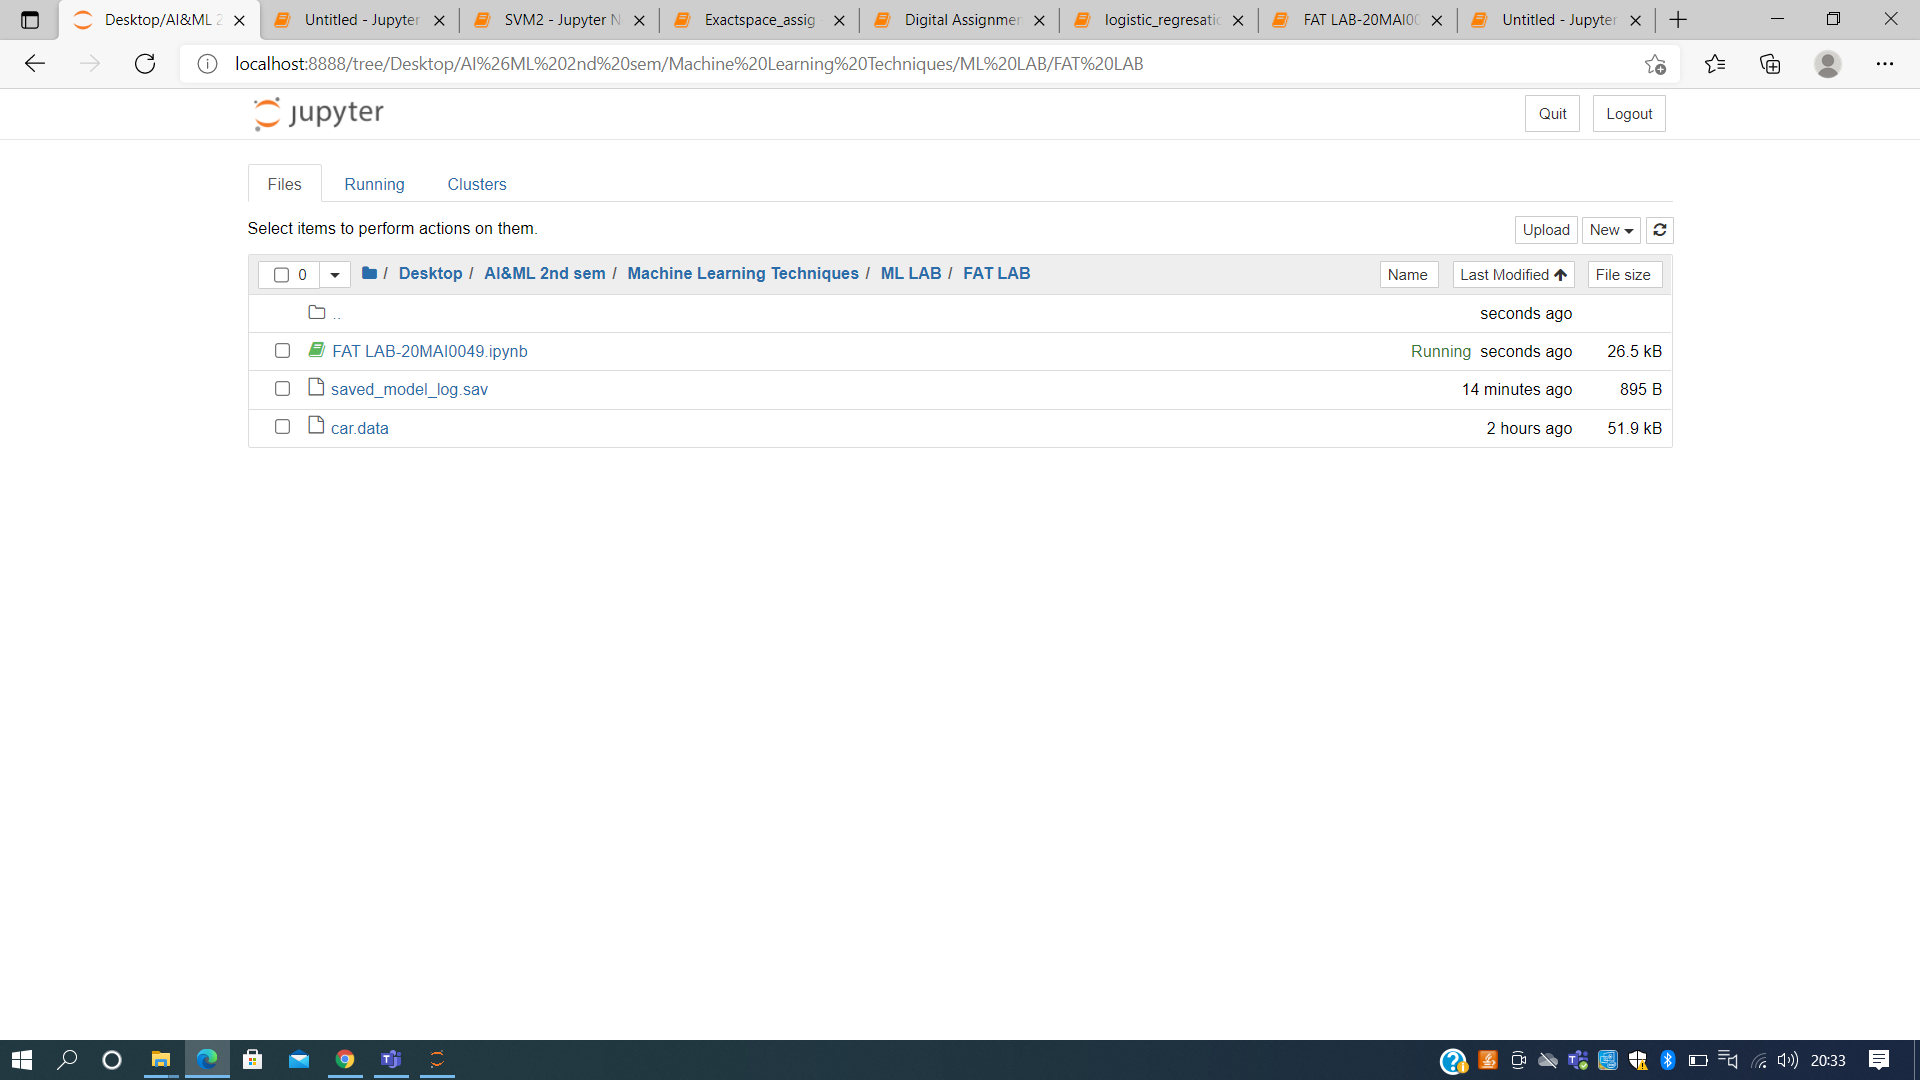

In [231]:
#6 RUN THE SAVED MODEL

filename = 'saved_model_log.sav'
saved_logitCV = pickle.load(open(filename, 'rb'))
saved_logitCV.score(X_test, Y_test)

0.6805555555555556

# Support Vector Machine

In [232]:
#import modal from sklearn and used kernel = rbf
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

In [233]:
#training of modal
rbf_model.fit(X_train, Y_train)

SVC()

In [235]:
#to get accuracy
rbf_model.score(X_test,Y_test)

0.9143518518518519

In [237]:
#another modal is created with kernal is linear
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [239]:
#Accuracy
linear_model.score(X_test,Y_test)

0.7245370370370371

# Conclusion

From logistic regression and SVM, SVM gave the highest accuracy ie 91.43% as comapred to logistic regression. if we see in SVM, SVM with kernel is rbf(Radial Basis Function) have highest accuracy ie 91.43 as compared to SVM with kernel is linear. 